In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.special as poly

In [2]:
numsteps = 100
burnin = 50
dof = 4
n = 100 + 1
totsteps = 25000
savesteps = 100
completedata = np.zeros(numsteps)
mmat = np.zeros((dof, dof))
rvec = np.zeros(dof)
ft = 10.0

x = np.zeros(savesteps + 1)
t = np.arange(0, ft + 0.1, 0.1)
h = (t[1]-t[0])/(n-1)
h12 = np.sqrt(h)
g = 1/2
coef = np.array([1., 2., -1., -0.5])

In [3]:
def frozendrift(x, coef):
    y = np.zeros(coef.size)
    for i in range(dof):
        H = poly.hermitenorm(i)
        y[i] = H(x)
    z = np.dot(y, coef)
    return z

In [4]:
def drift(x, theta):
    y = np.zeros(x.size)
    for i in range(x.size):
        for j in range(dof):
            H = poly.hermitenorm(j)
            y[i] = y[i] + theta[j] * H(x[i])
    return y

In [5]:
traj = 0.0
j = 1
x[0] = traj
t[0] = 0.0
for i in range(0, totsteps):
    traj = traj + frozendrift(traj, coef) * h + g * h12 * np.random.rand(1)
    if (i % (totsteps/savesteps) == 0):
        x[j] = traj
#         t[j] = i*h
        j = j + 1

[ 0.          0.01421191  2.47186471  2.8720532   2.90824345  2.8392004
  2.848797    2.89305485  2.87519051  2.92569719  2.85038569  2.9124194
  2.84900183  2.84655082  2.89464001  2.86539378  2.84945143  2.8578959
  2.84285088  2.8596511   2.84480838  2.84357988  2.85073614  2.86042998
  2.84905966  2.92562136  2.85800736  2.90862073  2.83292357  2.85059787
  2.82210165  2.78648945  2.85789083  2.8135527   2.82924722  2.85562744
  2.86187175  2.92674402  2.85716662  2.86973647  2.84520162  2.91916844
  2.88125944  2.87889921  2.85178953  2.90896882  2.88652391  2.84684646
  2.8524739   2.85331276  2.83714319  2.79533352  2.89780912  2.8779901
  2.84559886  2.84250356  2.89366958  2.8661069   2.84059762  2.87453882
  2.90694848  2.86080005  2.83653807  2.88245455  2.82985017  2.84765695
  2.84710752  2.93257093  2.87848355  2.82047858  2.88137743  2.85477675
  2.90660841  2.90474576  2.81931258  2.86644278  2.83760735  2.87803411
  2.83396719  2.84289297  2.84879679  2.84402562  2.849

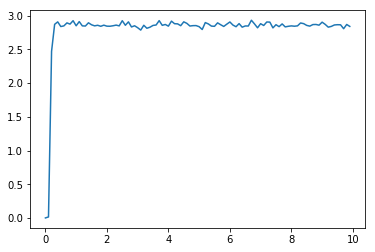

In [6]:
x = x[:(-1)]
t = t[:(-1)]
plt.plot(t, x)
print(x)
print(t)

In [7]:
def brownianbridge(xin, tin, h):
    n = (tin[1] - tin[0]) / h
    tvec = tin[0] + (1+np.arange(n))*h
    h12 = np.sqrt(h)
    wincs = np.random.normal(scale=h12, size=n)
    w = np.cumsum(wincs)
    bridge = xin[0] + w - ((tvec - tin[0])/(tin[1]-tin[0]))*(w[n-1] + xin[0] - xin[1])
    return tvec, bridge

/home/shagun/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/shagun/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
        0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,
        0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,
        0.024,  0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,
        0.032,  0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,
        0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,
        0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,  0.054,  0.055,
        0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,  0.062,  0.063,
        0.064,  0.065,  0.066,  0.067,  0.068,  0.069,  0.07 ,  0.071,
        0.072,  0.073,  0.074,  0.075,  0.076,  0.077,  0.078,  0.079,
        0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ])

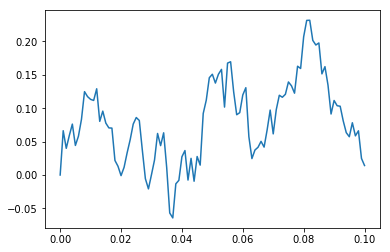

In [8]:
tout, bout = brownianbridge(x,t,h)
tout = np.concatenate((t[[0]],tout))
bout = np.concatenate((x[[0]],bout))
plt.plot(tout,bout)
tout

In [9]:
theta = np.array([1., 1., -1., -0.25])

In [10]:
# girsanov LOG likelihood
def girsanov(path, dt, theta):
    b = drift(path, theta)
    int1 = np.dot(b[:-1], np.diff(path))
    b2 = np.square(b)
    int2 = np.sum(0.5*(b2[1:] + b2[:-1]))*dt
    r = int1 - 0.5*int2
    return r

In [ ]:
def mypoly(x):
    y = np.zeros((x.size, dof))
    for i in range(x.size):
        for j in range(dof):
            H = poly.hermitenorm(j)
            y[i,j] = H(x[i])
    return y

In [ ]:
done = 0
mytol = np.power(10, -3)
numiter = 0
while (done == 0):
    numiter = numiter + 1
    print(numiter)
    tout, xcur = brownianbridge(x,t,h)
    oldlik = girsanov(path=xcur, dt=h, theta=theta)

    for jj in range(numsteps + burnin):
        _, prop = brownianbridge(x,t,h)
        proplik = girsanov(path=prop, dt=h, theta=theta)
        rho = np.exp(proplik - oldlik)
        if (rho > np.random.uniform()):
            xcur = prop
            oldlik = proplik
        # ignore samples during burnin phase
        if (jj > burnin):
            pp = mypoly(xcur[:(-1)])
            mmat = mmat + h * np.matmul(pp.T, pp) / numsteps
            rvec = rvec + np.matmul((np.diff(xcur)).T, pp) / numsteps

    newtheta = np.linalg.solve(mmat, rvec)
    check = np.sum(np.abs(newtheta - theta))
    if (check < mytol):
        print("finished!")
        print(check)
        print(theta)
        done = 1
    theta = newtheta
    print(check)
    print(theta)

1


/home/shagun/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/shagun/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


394.769222949
[  -2.62650765  283.40239775   -3.00791849  106.48239906]
2
325.564542378
[  -3.39272863  523.3161662    -4.00894372  190.36592678]
3
119.98112785
[ -10.78190674  601.02982963  -11.57077337  217.68238344]
4
123.088686436
[ -10.60030776  691.9045239   -11.33718483  249.48118807]
5
31.0759288415
[ -12.54659487  712.01795207  -13.29474072  256.53984574]
6
80.4779674947
[  -9.20957113  766.74607305   -9.85504384  275.51297163]
7
34.8649169635
[ -12.26472314  787.81105867  -13.04097072  283.07182408]
8
16.6051266132
[  -8.26279071  793.99968423   -8.93808815  285.38351012]
9
20.2791018315
[  -8.42351814  808.56812771   -9.10289626  290.76863293]
10
62.5561564793
[  -8.35440849  854.84710772   -9.01359327  306.88739676]
11
69.8704066956
[  -6.19226801  903.51848456   -6.81683804  323.72753089]
12
52.8952739155
[  -6.72377997  941.99475402   -7.38861095  337.04325047]
13
58.521178539
[  -6.82486537  985.15981809   -7.56227379  352.1246167 ]
14
66.3860218785
[   -6.9777829   1034